In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 

In [18]:
fruit = pd.read_table("fruit_data_with_colors.txt");
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


C:\Users\Ben\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


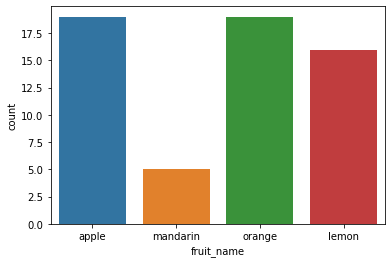

In [19]:
sns.countplot(fruit['fruit_name'],label="Count")
plt.show()

In [20]:
fruit_vector=fruit[["mass","width","height","color_score","fruit_name"]]
fruit_vector.head()

,mass,width,height,color_score,fruit_name
0,192,8.4,7.3,0.55,apple
1,180,8.0,6.8,0.59,apple
2,176,7.4,7.2,0.60,apple
3,86,6.2,4.7,0.80,mandarin
4,84,6.0,4.6,0.79,mandarin


In [21]:
X = fruit_vector.iloc[:,:-1].values
y = fruit_vector.iloc[:,4].values
print(X[0:4])
print(y[0:4])

[[192.     8.4    7.3    0.55]
 [180.     8.     6.8    0.59]
 [176.     7.4    7.2    0.6 ]
 [ 86.     6.2    4.7    0.8 ]]
['apple' 'apple' 'apple' 'mandarin']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4321)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
for nn in range(1, 9): 
    classifier = KNeighborsClassifier(n_neighbors=nn)  
    print("neighbours ):",nn)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print("kNN %):", metrics.accuracy_score(y_test, y_pred)*100, "\n")

neighbours ): 1
[[7 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 6]]
kNN %): 100.0 

neighbours ): 2
[[7 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 6]]
kNN %): 100.0 

neighbours ): 3
[[7 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 6]]
kNN %): 100.0 

neighbours ): 4
[[7 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 6]]
kNN %): 100.0 

neighbours ): 5
[[4 0 0 3]
 [0 2 0 0]
 [0 3 0 0]
 [0 0 0 6]]
kNN %): 66.66666666666666 

neighbours ): 6
[[4 0 0 3]
 [0 2 0 0]
 [0 3 0 0]
 [0 1 0 5]]
kNN %): 61.111111111111114 

neighbours ): 7
[[2 0 0 5]
 [0 2 0 0]
 [0 2 0 1]
 [0 0 0 6]]
kNN %): 55.55555555555556 

neighbours ): 8
[[2 0 0 5]
 [0 2 0 0]
 [0 2 0 1]
 [0 2 0 4]]
kNN %): 44.44444444444444 



In [24]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
GaussianNB()
print(confusion_matrix(y_test, y_pred))
print("GNB %):", metrics.accuracy_score(y_test, y_pred)*100)

[[7 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [2 0 0 4]]
GNB %): 88.88888888888889


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 

def fit(x_set, y_set):
    df = pd.DataFrame(x_set)
    mean = df.groupby(by=y_set).mean()
    var = df.groupby(by=y_set).var()
    return mean, var

def gnb_calc(x_val, x_mean, x_var):
    eq_pt1 = 1/(np.sqrt(2 * np.pi * x_var))
    expon = np.exp(-(((x_val - x_mean) ** 2) / (2 * x_var)))
    prob = eq_pt1 * expon
    return prob

def calc_prior(classifier, dataset):
    count = 0;
    total = len(dataset)
    for i in range(total):
        if dataset[i] == classifier:
            count += 1
    return count / total

def mv_pairs_by_class(mean, var, y_train):
    mv_temp = []
    m = np.array(mean)
    v = np.array(var)
    
    for i in range(len(mean)):
        m_row = m[i]
        v_row = v[i]
        for index, value in enumerate(m_row):
            mean = value
            var = v_row[index]
            mv_temp.append([mean, var])
    mv_pairings = np.array(mv_temp)
    n_class = len(np.unique(y_train))
    s = np.vsplit(mv_pairings, n_class)
    return s

def classify(x_test, classes, mv_pairs, priors):
    p_temp = []
    for i in range(len(classes)):
        a_class = mv_pairs[i]
        for j in range(len(a_class)):
            class_x_mean = a_class[j][0]
            class_x_var = a_class[j][1]
            x_value = x_test[j]
            p_temp.append([gnb(x_value, class_x_mean, class_x_var)])
    prob = np.array(p_temp)
    prob_class = np.vsplit(prob, len(classes))
    j = 0
    final_probs = []
    for i in prob_class:
        class_prob = np.prod(i) * priors[j]
        final_probs.append(class_prob)
        j += 1
    
    index = final_probs.index(max(final_probs))
    return classes[index]
    

def GNB(x_train, x_test, y_train, y_test):
    
    mean, var = fit(x_train, y_train)
    mv_pairs = mv_pairs_by_class(mean, var, y_train)
    
    classes = np.unique(y_train)
    priors = []
    for i in range(len(classes)):
        priors.append(calc_prior(classes[0], y_train))
    
    results = []
    count = 0
    for i in range(len(x_test)):
        results.append(classify(x_test[i], classes, mv_pairs, priors))
        print(results[i], y_test[i])
        if results[i] == y_test[i]:
            count += 1
    accuracy = (count / len(x_test)) * 100
    print("accuracy: ", accuracy)
    
GNB(X_train, X_test, y_train, y_test)

apple apple
orange orange
apple orange
apple apple
apple orange
mandarin mandarin
apple apple
lemon lemon
orange orange
orange orange
apple apple
orange orange
apple apple
lemon lemon
mandarin mandarin
apple apple
apple apple
mandarin mandarin
accuracy:  88.88888888888889


In [81]:
def fit(x_set, y_set):
    df = pd.DataFrame(x_set)
    mean = df.groupby(by=y_set).mean()
    var = df.groupby(by=y_set).var()
    return mean, var

mean, var = fit(X_train, y_train)

m = np.array(mean)
v = np.array(var)

mv_temp = []

for i in range(len(m)):
    m_row = m[i]
    v_row = v[i]
    for index, value in enumerate(m_row):
        mean = value
        var = v_row[index]
        mv_temp.append([mean, var])

mv_pairs = np.array(mv_temp)
n_class = len(np.unique(y_train))
s = np.vsplit(mv_pairs, n_class)

def gnb(x_val, x_mean, x_var):
    eq_pt1 = 1/(np.sqrt(2 * np.pi * x_var))
    expon = np.exp(-(((x_val - x_mean) ** 2) / (2 * x_var)))
    prob = eq_pt1 * expon
    return prob

sample = X_test[0]

print("Test Data", X_test[0], y_test[0], "\n")

p_temp = []

for i in range(n_class):
    a_class = s[i]
    for i in range(len(a_class)):
        a_class_x_mean = a_class[i][0]
        a_class_x_var = a_class[i][1]
        x_vals = X_test[0][i]
        p_temp.append([gnb(x_vals, a_class_x_mean, a_class_x_var)])
        
prob = np.array(p_temp)
prob_class = np.vsplit(prob, n_class)

def calc_prior(classifier, dataset):
    count = 0;
    total = len(dataset)
    for i in range(total):
        if dataset[i] == classifier:
            count += 1
    return count / total

classes = np.unique(y_train)
priors = [calc_prior(np.unique(y_train)[0], y_train), 
          calc_prior(np.unique(y_train)[1], y_train), 
          calc_prior(np.unique(y_train)[2], y_train), 
          calc_prior(np.unique(y_train)[3], y_train)]
print("Priors \n", priors, "\n", classes, "\n")

j = 0
final_probs = []
for i in prob_class:
    class_prob = np.prod(i) * priors[j]
    final_probs.append(class_prob)
    j += 1
    
print("\n", final_probs)
index = final_probs.index(max(final_probs))
print(classes[index])

Test Data [-0.14731076 -0.05022484 -0.6101242   1.51131399] apple 

Priors 
 [0.2926829268292683, 0.34146341463414637, 0.04878048780487805, 0.3170731707317073] 
 ['apple' 'lemon' 'mandarin' 'orange'] 


 [0.02624262022002635, 2.4206923732238494e-49, 2.15189272601198e-229, 5.8673546938451315e-05]
apple
